###CLUSTERING: KMeans

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [102]:
!pip install pydataset

In [103]:
from pydataset import data

In [104]:
# Carga del datset
iris_original = data('iris')
# Copia para luego validar
iris = iris_original.copy()
# Se eliminan las etiquetas
del iris['Species']

# Asignación de colores
iris_original['Color']='red' # Nueva columna con el color
iris_original.loc[iris_original.Species == "setosa",'Color']='green'
iris_original.loc[iris_original.Species == "versicolor",'Color']='blue'
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
1,5.1,3.5,1.4,0.2,setosa,green
2,4.9,3.0,1.4,0.2,setosa,green
3,4.7,3.2,1.3,0.2,setosa,green
4,4.6,3.1,1.5,0.2,setosa,green
5,5.0,3.6,1.4,0.2,setosa,green


In [105]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

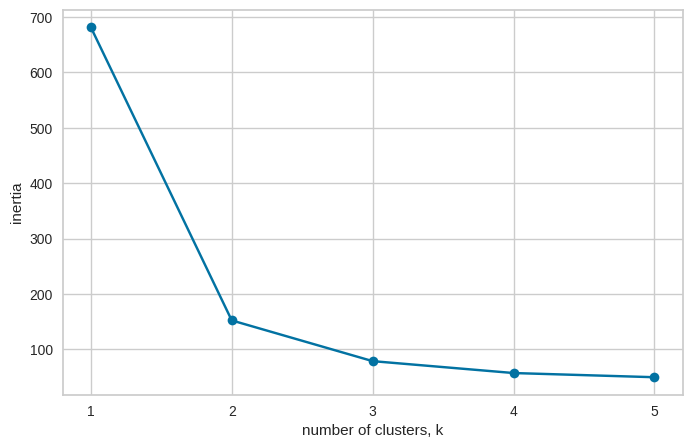

In [106]:
ks = range(1, 6)
inertias = []
for k in ks:
# Genera un modelo para KMeans con k clústeres
    model = KMeans(k)
# Ajusta el modelo a las muestras
    model.fit(iris)
# Agrega las inercias calculadas
    inertias.append(model.inertia_)
# Gráfico de inercias vs. número de clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Método del Codo para determinar el número de clusters a formar:


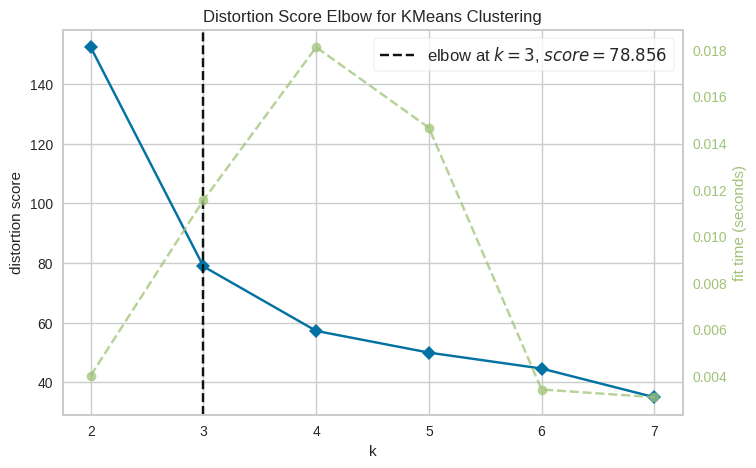

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Examinando rápidamente el método del codo para encontrar el número de clusters a crear.
print('Método del Codo para determinar el número de clusters a formar:')
Elbow_M = KElbowVisualizer(KMeans(), k= 7)
Elbow_M.fit(iris)
Elbow_M.show()

In [115]:
# Create a KMeans instance with k clusters: model
model = KMeans(3)

# Fit model to samples
#model.fit(iris)
labels = model.fit_predict(iris)

In [116]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [117]:
iris_original['Cluster']= labels

In [118]:
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster
1,5.1,3.5,1.4,0.2,setosa,green,1
2,4.9,3.0,1.4,0.2,setosa,green,1
3,4.7,3.2,1.3,0.2,setosa,green,1
4,4.6,3.1,1.5,0.2,setosa,green,1
5,5.0,3.6,1.4,0.2,setosa,green,1


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


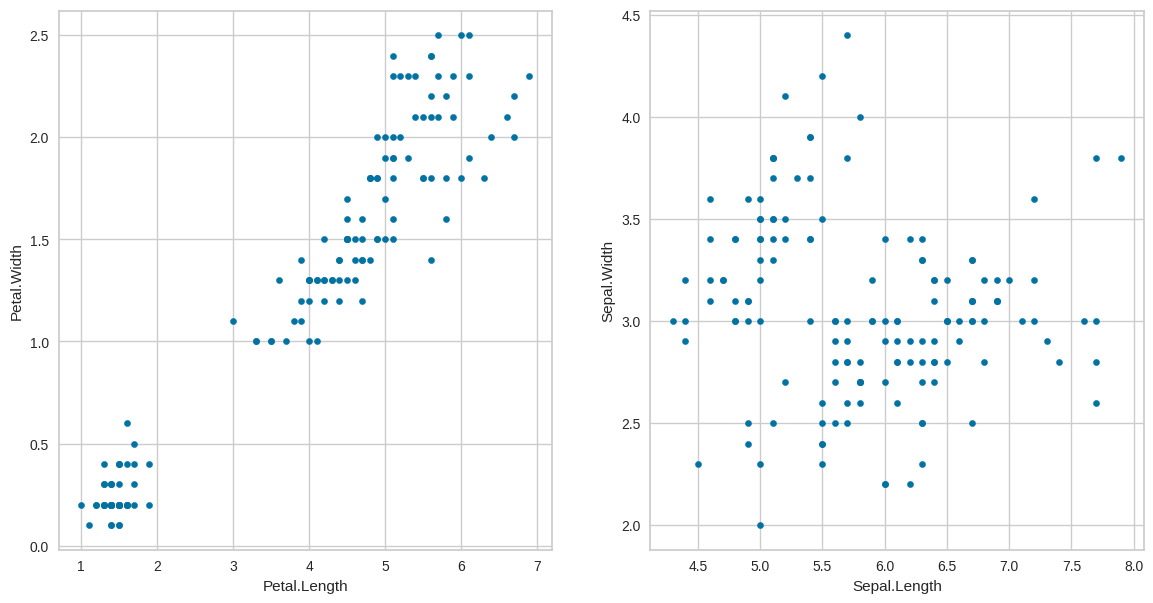

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

fig, axes = plt.subplots(nrows=1, ncols=2)

iris_original.plot(ax=axes[0],x='Petal.Length', y='Petal.Width',
         kind='scatter')
iris_original.plot(ax=axes[1],x='Sepal.Length', y='Sepal.Width',
         kind='scatter')
plt.show()

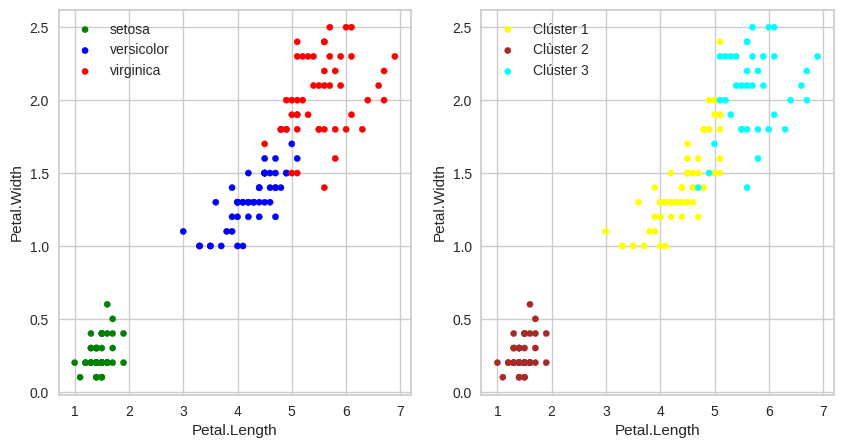

In [120]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

fig, axes = plt.subplots(nrows=1, ncols=2)

specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')

ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best')

iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == 1,'Color2']='brown'
iris_original.loc[iris_original.Cluster == 2,'Color2']='cyan'

cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 2,:]
ax2=cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')

ax2.legend(('Clúster 1','Clùster 2','Clúster 3'), loc='best')

plt.show()

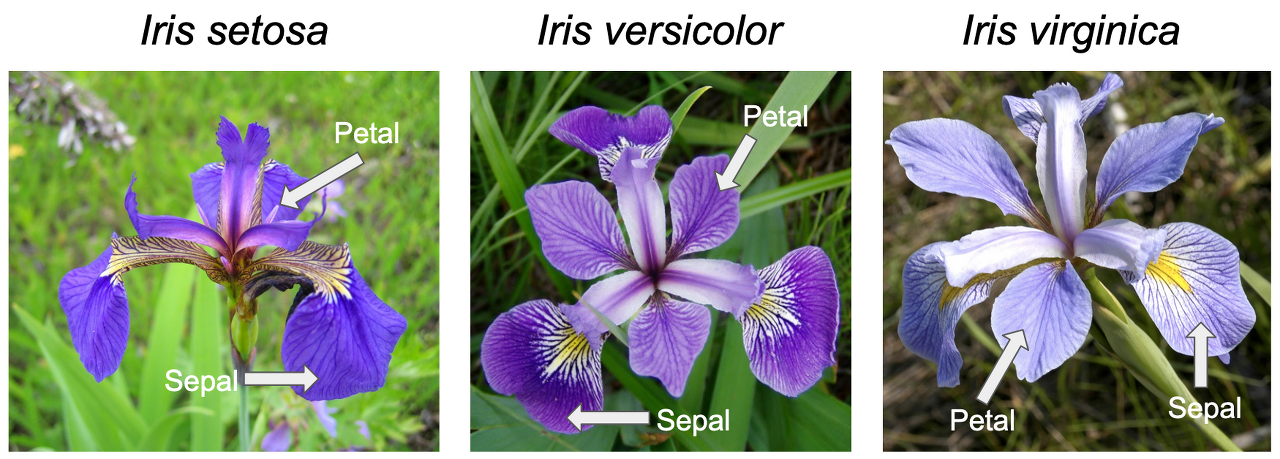

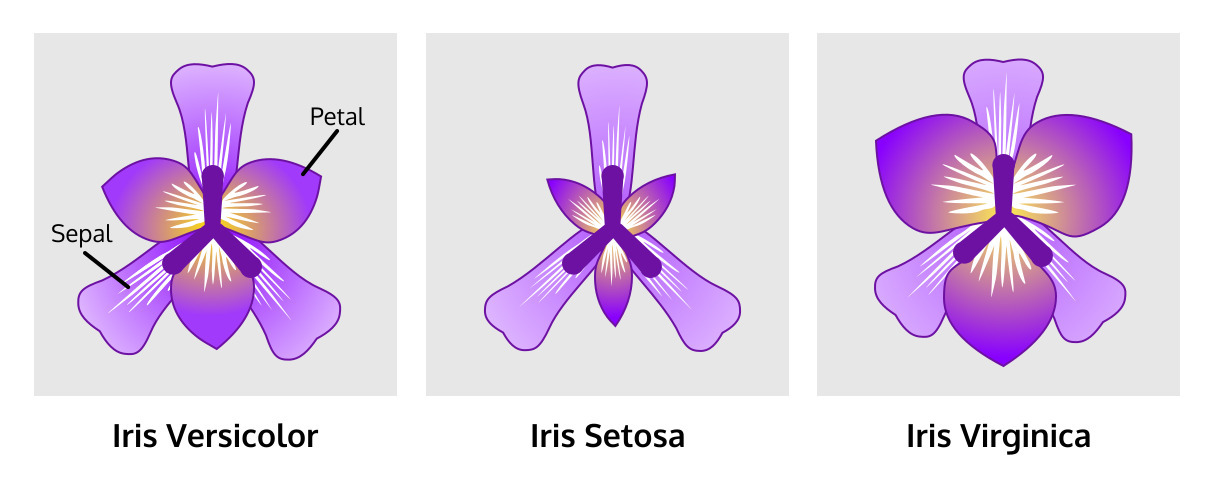

In [121]:
#En la columna 'Cluster' reemplazamos el 0,1,2 por 'virginica', 'setosa' y 'versicolor'
iris_original['Cluster'] = iris_original['Cluster'].replace(0,'versicolor_pred')
iris_original['Cluster'] = iris_original['Cluster'].replace(1,'setosa_pred')
iris_original['Cluster'] = iris_original['Cluster'].replace(2,'virginica_pred')

In [122]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])

In [123]:
print(ct)

Cluster     setosa_pred  versicolor_pred  virginica_pred
Species                                                 
setosa               50                0               0
versicolor            0               47               3
virginica             0               14              36


In [124]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


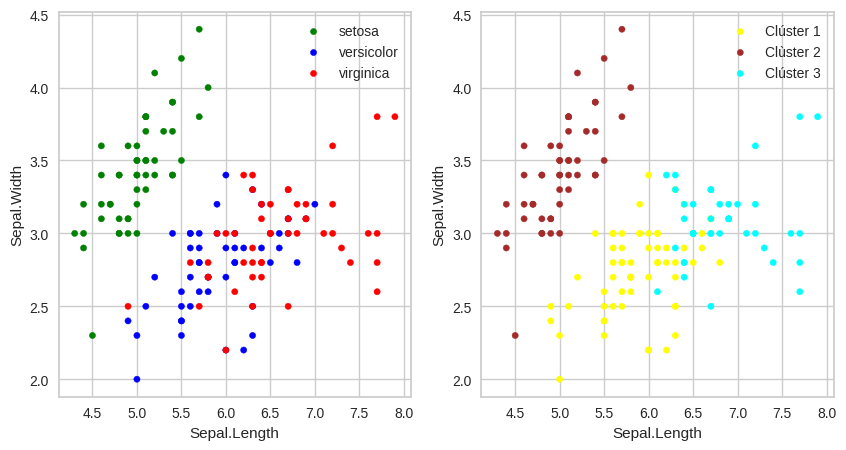

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

fig, axes = plt.subplots(nrows=1, ncols=2)

specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best')

iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == "setosa_pred",'Color2']='brown'
iris_original.loc[iris_original.Cluster == "virginica_pred",'Color2']='cyan'

cluster = iris_original.loc[iris_original.Cluster == "versicolor_pred",:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == "setosa_pred",:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == "virginica_pred",:]
ax2=cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')

ax2.legend(('Clúster 1','Clùster 2','Clúster 3'), loc='best')


plt.show()

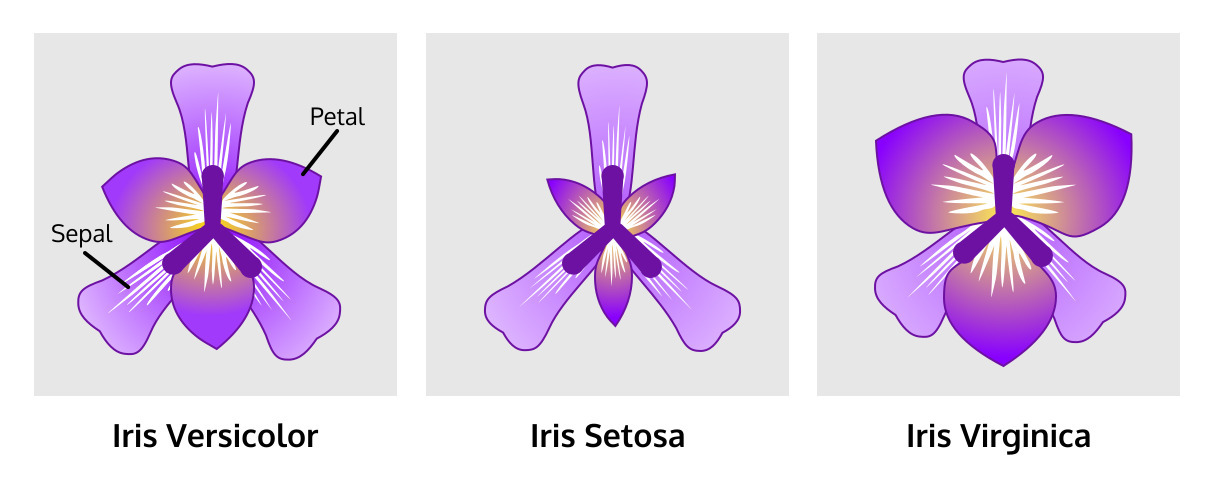